![](https://assets.datacamp.com/production/course_13367/shields/original/shield_image_course_13367_20200118-1-cwkw1p?1579372751)

## DATABASE CREATION AND CONNECTION

In [1]:
!pip install SQLAlchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.9
    Uninstalling SQLAlchemy-2.0.9:
      Successfully uninstalled SQLAlchemy-2.0.9


JUST RUN NEXT 4 CELLS

In [2]:
import sqlite3
import pandas as pd

In [3]:
# run this to create and connect to database
connection = sqlite3.connect('cloud.db')

In [4]:
# load sql extension
%load_ext sql

In [5]:
# connecting to cloud.db
%sql sqlite:///cloud.db

## CREATING TABLES

JUST RUN NEXT 3 CELLS

In [6]:
%%sql

CREATE TABLE employee (
  emp_id INT PRIMARY KEY,
  first_name VARCHAR(40),
  last_name VARCHAR(40),
  birth_day DATE,
  sex VARCHAR(1),
  salary INT,
  super_id INT,
  branch_id INT,
  FOREIGN KEY(super_id) REFERENCES employee(emp_id) ON DELETE SET NULL,
  FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE SET NULL
);

 * sqlite:///cloud.db
Done.


[]

In [7]:
%%sql

CREATE TABLE branch (
  branch_id INT PRIMARY KEY,
  branch_name VARCHAR(40),
  mgr_id INT,
  mgr_start_date DATE,
  FOREIGN KEY(mgr_id) REFERENCES employee(emp_id) ON DELETE SET NULL
);

 * sqlite:///cloud.db
Done.


[]

In [8]:
%%sql

CREATE TABLE client (
  client_id INT PRIMARY KEY,
  client_name VARCHAR(40),
  branch_id INT,
  FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE SET NULL
);

CREATE TABLE works_with (
  emp_id INT,
  client_id INT,
  total_sales INT,
  PRIMARY KEY(emp_id, client_id),
  FOREIGN KEY(emp_id) REFERENCES employee(emp_id) ON DELETE CASCADE,
  FOREIGN KEY(client_id) REFERENCES client(client_id) ON DELETE CASCADE
);

CREATE TABLE branch_supplier (
  branch_id INT,
  supplier_name VARCHAR(40),
  supply_type VARCHAR(40),
  PRIMARY KEY(branch_id, supplier_name),
  FOREIGN KEY(branch_id) REFERENCES branch(branch_id) ON DELETE CASCADE
);

 * sqlite:///cloud.db
Done.
Done.
Done.


[]

# **`Company Schema`**



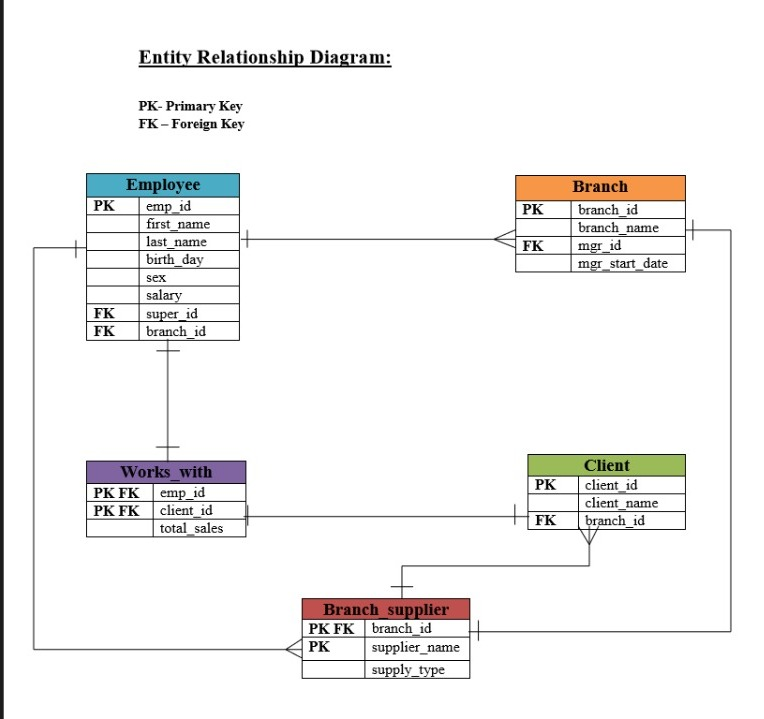

## INSERTING THE DATA

JUST RUN NEXT CELL

In [9]:
%%sql

-- Corporate
INSERT INTO employee VALUES(100, 'David', 'Wallace', '1967-11-17', 'M', 250000, NULL, NULL);

INSERT INTO branch VALUES(1, 'Corporate', 100, '2006-02-09');

UPDATE employee
SET branch_id = 1
WHERE emp_id = 100;

INSERT INTO employee VALUES(101, 'Jan', 'Levinson', '1961-05-11', 'F', 110000, 100, 1);

-- Scranton
INSERT INTO employee VALUES(102, 'Michael', 'Scott', '1964-03-15', 'M', 75000, 100, NULL);

INSERT INTO branch VALUES(2, 'Scranton', 102, '1992-04-06');

UPDATE employee
SET branch_id = 2
WHERE emp_id = 102;

INSERT INTO employee VALUES(103, 'Angela', 'Martin', '1971-06-25', 'F', 63000, 102, 2);
INSERT INTO employee VALUES(104, 'Kelly', 'Kapoor', '1980-02-05', 'F', 55000, 102, 2);
INSERT INTO employee VALUES(105, 'Stanley', 'Hudson', '1958-02-19', 'M', 69000, 102, 2);

-- Stamford
INSERT INTO employee VALUES(106, 'Josh', 'Porter', '1969-09-05', 'M', 78000, 100, NULL);

INSERT INTO branch VALUES(3, 'Stamford', 106, '1998-02-13');

UPDATE employee
SET branch_id = 3
WHERE emp_id = 106;

INSERT INTO employee VALUES(107, 'Andy', 'Bernard', '1973-07-22', 'M', 65000, 106, 3);
INSERT INTO employee VALUES(108, 'Jim', 'Halpert', '1978-10-01', 'M', 71000, 106, 3);


-- BRANCH SUPPLIER
INSERT INTO branch_supplier VALUES(2, 'Hammer Mill', 'Paper');
INSERT INTO branch_supplier VALUES(2, 'Uni-ball', 'Writing Utensils');
INSERT INTO branch_supplier VALUES(3, 'Patriot Paper', 'Paper');
INSERT INTO branch_supplier VALUES(2, 'J.T. Forms & Labels', 'Custom Forms');
INSERT INTO branch_supplier VALUES(3, 'Uni-ball', 'Writing Utensils');
INSERT INTO branch_supplier VALUES(3, 'Hammer Mill', 'Paper');
INSERT INTO branch_supplier VALUES(3, 'Stamford Lables', 'Custom Forms');

-- CLIENT
INSERT INTO client VALUES(400, 'Dunmore Highschool', 2);
INSERT INTO client VALUES(401, 'Lackawana Country', 2);
INSERT INTO client VALUES(402, 'FedEx', 3);
INSERT INTO client VALUES(403, 'John Daly Law, LLC', 3);
INSERT INTO client VALUES(404, 'Scranton Whitepages', 2);
INSERT INTO client VALUES(405, 'Times Newspaper', 3);
INSERT INTO client VALUES(406, 'FedEx', 2);

-- WORKS_WITH
INSERT INTO works_with VALUES(105, 400, 55000);
INSERT INTO works_with VALUES(102, 401, 267000);
INSERT INTO works_with VALUES(108, 402, 22500);
INSERT INTO works_with VALUES(107, 403, 5000);
INSERT INTO works_with VALUES(108, 403, 12000);
INSERT INTO works_with VALUES(105, 404, 33000);
INSERT INTO works_with VALUES(107, 405, 26000);
INSERT INTO works_with VALUES(102, 406, 15000);
INSERT INTO works_with VALUES(105, 406, 130000);

 * sqlite:///cloud.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [10]:
%%sql

select * from employee;

 * sqlite:///cloud.db
Done.


emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
100,David,Wallace,1967-11-17,M,250000,None,1
101,Jan,Levinson,1961-05-11,F,110000,100,1
102,Michael,Scott,1964-03-15,M,75000,100,2
103,Angela,Martin,1971-06-25,F,63000,102,2
104,Kelly,Kapoor,1980-02-05,F,55000,102,2
105,Stanley,Hudson,1958-02-19,M,69000,102,2
106,Josh,Porter,1969-09-05,M,78000,100,3
107,Andy,Bernard,1973-07-22,M,65000,106,3
108,Jim,Halpert,1978-10-01,M,71000,106,3


In [11]:
%%sql

select * from branch;

 * sqlite:///cloud.db
Done.


branch_id,branch_name,mgr_id,mgr_start_date
1,Corporate,100,2006-02-09
2,Scranton,102,1992-04-06
3,Stamford,106,1998-02-13


In [12]:
%%sql

select * from client;

 * sqlite:///cloud.db
Done.


client_id,client_name,branch_id
400,Dunmore Highschool,2
401,Lackawana Country,2
402,FedEx,3
403,"John Daly Law, LLC",3
404,Scranton Whitepages,2
405,Times Newspaper,3
406,FedEx,2


In [13]:
%%sql

select * from works_with;

 * sqlite:///cloud.db
Done.


emp_id,client_id,total_sales
105,400,55000
102,401,267000
108,402,22500
107,403,5000
108,403,12000
105,404,33000
107,405,26000
102,406,15000
105,406,130000


In [14]:
%%sql

select * from branch_supplier;

 * sqlite:///cloud.db
Done.


branch_id,supplier_name,supply_type
2,Hammer Mill,Paper
2,Uni-ball,Writing Utensils
3,Patriot Paper,Paper
2,J.T. Forms & Labels,Custom Forms
3,Uni-ball,Writing Utensils
3,Hammer Mill,Paper
3,Stamford Lables,Custom Forms


# **`TASK START FROM HERE`**

# Intermediate Queries
<hr>

<b>NOTE:</b> Some of the methods in mysql may not work in sqlite, please feel free to search for a substitute.

## 1. Get the average salaries of in each branch

In [15]:
%%sql
select b.branch_name, avg(e.salary) as average_salary from
employee as e join branch as b on e.branch_id = b.branch_id
group by b.branch_name

 * sqlite:///cloud.db
Done.


branch_name,average_salary
Corporate,180000.0
Scranton,65500.0
Stamford,71333.33333333333


## 2. Print all the employee last names whose length of last name is less than 7

In [16]:
%%sql
select last_name from employee
where length(last_name) < 7

 * sqlite:///cloud.db
Done.


last_name
Scott
Martin
Kapoor
Hudson
Porter


## 3. Print the branch id counts from employee

In [17]:
%%sql
select b.branch_id, count(e.emp_id) as count from
employee as e join branch as b on e.branch_id = b.branch_id
group by b.branch_id

 * sqlite:///cloud.db
Done.


branch_id,count
1,2
2,4
3,3


## 4. Get the difference between maximum and minimum sales

In [18]:
%%sql
select max(total_sales) - min(total_sales) as difference from works_with

 * sqlite:///cloud.db
Done.


difference
262000


## 5. Print all employee names who were born between 1960 and 1970

In [19]:
%%sql
select * from employee 
where strftime('%Y', birth_day) between '1960' and '1970' 

 * sqlite:///cloud.db
Done.


emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
100,David,Wallace,1967-11-17,M,250000,None,1
101,Jan,Levinson,1961-05-11,F,110000,100,1
102,Michael,Scott,1964-03-15,M,75000,100,2
106,Josh,Porter,1969-09-05,M,78000,100,3


## 6. Print all the client names by replacing the spaces with "_"

In [20]:
%%sql
select replace(client_name," ","_") as client_names from client
 

 * sqlite:///cloud.db
Done.


client_names
Dunmore_Highschool
Lackawana_Country
FedEx
"John_Daly_Law,_LLC"
Scranton_Whitepages
Times_Newspaper
FedEx


## 7. Write a query to display 3 rows starting from 3rd row for employee table

In [21]:
%%sql
/* select emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id from (select row_number() over(order by emp_id) row_num,* from employee)
where row_num in (4,5,6) */

select * from employee
where emp_id in (103,104,105)
order by emp_id

 * sqlite:///cloud.db
Done.


emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
103,Angela,Martin,1971-06-25,F,63000,102,2
104,Kelly,Kapoor,1980-02-05,F,55000,102,2
105,Stanley,Hudson,1958-02-19,M,69000,102,2


## 8. Get the full names of the employess whose last name ends with 'n'

In [22]:
%%sql 
select first_name || " " || last_name as full_name from employee
where substr(last_name,-1,1) = 'n'

 * sqlite:///cloud.db
Done.


full_name
Jan Levinson
Angela Martin
Stanley Hudson


## 9. Get the details of employees who were born in february month.

In [23]:
%%sql
select * from employee 
where strftime('%m', birth_day) = '02'

 * sqlite:///cloud.db
Done.


emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
104,Kelly,Kapoor,1980-02-05,F,55000,102,2
105,Stanley,Hudson,1958-02-19,M,69000,102,2


## 10. Get the male and female count of Scranton branch

In [24]:
%%sql
select e.sex, count(e.sex) from
employee as e join branch as b on e.branch_id = b.branch_id
where branch_name = 'Scranton'
group by e.sex

 * sqlite:///cloud.db
Done.


sex,count(e.sex)
F,2
M,2


## 11. Count the number of distinct supplier names whose names have 'll'

In [25]:
%%sql
select count(distinct supplier_name) from branch_supplier
where supplier_name like '%ll%'

 * sqlite:///cloud.db
Done.


count(distinct supplier_name)
2


## 12. Get the full name of the employee with second highest salary

In [26]:
%%sql
select first_name || " " || last_name as Full_name from 
(select row_number() over(order by salary desc) row_num,* from employee)
where row_num=2


 * sqlite:///cloud.db
Done.


Full_name
Jan Levinson


## 13. Get the employee full names who were born after 1970 and whose full name starts with 'a'

in sql we use year function to get the year from date, but in sqlite we use strftime() function: https://www.w3resource.com/sqlite/sqlite-strftime.php

In [27]:
%%sql
select first_name || " " || last_name as Full_name from employee 
where strftime('%Y', birth_day) > '1970' and Full_name like 'a%'

 * sqlite:///cloud.db
Done.


Full_name
Angela Martin
Andy Bernard


In [28]:
%%sql
select * from employee

 * sqlite:///cloud.db
Done.


emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id
100,David,Wallace,1967-11-17,M,250000,None,1
101,Jan,Levinson,1961-05-11,F,110000,100,1
102,Michael,Scott,1964-03-15,M,75000,100,2
103,Angela,Martin,1971-06-25,F,63000,102,2
104,Kelly,Kapoor,1980-02-05,F,55000,102,2
105,Stanley,Hudson,1958-02-19,M,69000,102,2
106,Josh,Porter,1969-09-05,M,78000,100,3
107,Andy,Bernard,1973-07-22,M,65000,106,3
108,Jim,Halpert,1978-10-01,M,71000,106,3


## 14. Get the number of unique female employee names who have worked with atleast one client

In [29]:
%%sql
select distinct e.first_name || " " || e.last_name as Full_name  
from employee as e left join works_with as w on e.emp_id = w.emp_id
where e.sex = 'F' and e.emp_id in (select distinct w.emp_id from works_with  as w group by w.emp_id having count(w.client_id) >=1)


 * sqlite:///cloud.db
Done.


Full_name


## 15. Get the female employee first name who was born on 25th day

In [30]:
%%sql
select first_name from employee 
where strftime('%d', birth_day) = '25' and sex = 'F'

 * sqlite:///cloud.db
Done.


first_name
Angela


## 16. Get all the branch names with their supplier name and supply type

In [31]:
%%sql
select b.branch_name, bs.supplier_name, bs.supply_type 
from branch as b left join branch_supplier as bs on b.branch_id = bs.branch_id


 * sqlite:///cloud.db
Done.


branch_name,supplier_name,supply_type
Corporate,None,None
Scranton,Hammer Mill,Paper
Scranton,J.T. Forms & Labels,Custom Forms
Scranton,Uni-ball,Writing Utensils
Stamford,Hammer Mill,Paper
Stamford,Patriot Paper,Paper
Stamford,Stamford Lables,Custom Forms
Stamford,Uni-ball,Writing Utensils


## 17. Get the Male and Female employees average salaries

In [32]:
%%sql
select sex as Gender, avg(salary) as average_salary from employee
group by Gender

 * sqlite:///cloud.db
Done.


Gender,average_salary
F,76000.0
M,101333.33333333333


In [33]:
%%sql
select * from works_with

 * sqlite:///cloud.db
Done.


emp_id,client_id,total_sales
105,400,55000
102,401,267000
108,402,22500
107,403,5000
108,403,12000
105,404,33000
107,405,26000
102,406,15000
105,406,130000


## 18. Get the client names who had made total sales greater than 1 lakh

In [34]:
%%sql
select client_name, sum(total_sales) from works_with as ww join client as c on ww.client_id = c.client_id
group by client_name
having sum(total_sales) > 100000
order by sum(total_sales) desc

 * sqlite:///cloud.db
Done.


client_name,sum(total_sales)
Lackawana Country,267000
FedEx,167500


## 19. How many employees don't have super id's

In [35]:
%%sql
select count(*) as employee_count from employee
where super_id is null

 * sqlite:///cloud.db
Done.


employee_count
1


## 20. Write an query to print the first three characters of first name and last name of an employee

In [36]:
%%sql
select substr(first_name,1,3) as first_name, substr(last_name,1,3) as last_name from employee

 * sqlite:///cloud.db
Done.


first_name,last_name
Dav,Wal
Jan,Lev
Mic,Sco
Ang,Mar
Kel,Kap
Sta,Hud
Jos,Por
And,Ber
Jim,Hal


## 21. Write a query to print all employee id and full names with odd employee id's

In [37]:
%%sql
select emp_id, first_name || " " || last_name as Full_name from employee
where emp_id % 2 <> 0

 * sqlite:///cloud.db
Done.


emp_id,Full_name
101,Jan Levinson
103,Angela Martin
105,Stanley Hudson
107,Andy Bernard


## 22. Count the number of 'a' in the full name of a employee irrespective of their case i.e. 'a' and 'A' should be counted

In [38]:
%%sql
select first_name || " " || last_name as Full_name, 
(length(first_name || " " || last_name) - length(replace(first_name || " " || last_name,'a','')))/length('a')  as count
from employee


 * sqlite:///cloud.db
Done.


Full_name,count
David Wallace,3
Jan Levinson,1
Michael Scott,1
Angela Martin,2
Kelly Kapoor,1
Stanley Hudson,1
Josh Porter,0
Andy Bernard,1
Jim Halpert,1


## 23. Print all the employee details along with an email column which contains values as first_name@gmail.com as values with first_name lower cased

In [39]:
%%sql
select *,lower(first_name) || "@gmail.com"as email from employee

 * sqlite:///cloud.db
Done.


emp_id,first_name,last_name,birth_day,sex,salary,super_id,branch_id,email
100,David,Wallace,1967-11-17,M,250000,None,1,david@gmail.com
101,Jan,Levinson,1961-05-11,F,110000,100,1,jan@gmail.com
102,Michael,Scott,1964-03-15,M,75000,100,2,michael@gmail.com
103,Angela,Martin,1971-06-25,F,63000,102,2,angela@gmail.com
104,Kelly,Kapoor,1980-02-05,F,55000,102,2,kelly@gmail.com
105,Stanley,Hudson,1958-02-19,M,69000,102,2,stanley@gmail.com
106,Josh,Porter,1969-09-05,M,78000,100,3,josh@gmail.com
107,Andy,Bernard,1973-07-22,M,65000,106,3,andy@gmail.com
108,Jim,Halpert,1978-10-01,M,71000,106,3,jim@gmail.com


# Advanced
<hr>

## 24. Get the client id and  names of the clients who worked male employees whose salary was greater than 70000

In [40]:
%%sql
select c.client_id, c.client_name 
from client as c join works_with as ww on c.client_id = ww.client_id
where ww.emp_id in (select emp_id from employee where sex = 'M' and salary > 70000)

 * sqlite:///cloud.db
Done.


client_id,client_name
401,Lackawana Country
406,FedEx
402,FedEx
403,"John Daly Law, LLC"


## 25. Get the employee id and full name whose average sales were greater than 70000 

In [41]:
%%sql
select emp_id, first_name || " " || last_name as Full_name 
from employee 
where emp_id in (select emp_id from works_with 
                  group by emp_id 
                  having avg(total_sales)>70000)

 * sqlite:///cloud.db
Done.


emp_id,Full_name
102,Michael Scott
105,Stanley Hudson


## 26. Get the employee id, name of the client for each employee who made maximum sales for the employee. Get the max sales as well, if no client or max sale were present then show none.

In [42]:
%%sql

with max_sales_data as 
	(select emp_id, client_id, max(total_sales) as max_sales
	from works_with
	group by emp_id)
	
select e.emp_id, mscd.client_name, mscd.max_sales
from employee as e
left join (
			select * from max_sales_data as msd
			inner join client as c
			on msd.client_id = c.client_id) as mscd
          on e.emp_id = mscd.emp_id

 * sqlite:///cloud.db
Done.


emp_id,client_name,max_sales
100,None,None
101,None,None
102,Lackawana Country,267000
103,None,None
104,None,None
105,FedEx,130000
106,None,None
107,Times Newspaper,26000
108,FedEx,22500


## 27. Get the unique branch names whose supply type Paper

In [44]:
%%sql
select distinct b.branch_name from branch as b  
join branch_supplier as bs on b.branch_id = bs.branch_id
where supply_type = 'Paper'

 * sqlite:///cloud.db
Done.


branch_name
Scranton
Stamford


## 28. Get the supply types with total sales less than 40000

In [46]:
%%sql
select distinct bs.supply_type from branch_supplier as bs
join client as c on bs.branch_id = c.branch_id
join works_with as ww on c.client_id = ww.client_id
where ww.total_sales < 40000

 * sqlite:///cloud.db
Done.


supply_type
Paper
Custom Forms
Writing Utensils


## 29. Get the employee full names with their average sales

In [51]:
%%sql
select e.first_name || " " || e.last_name as full_name, avg(ww.total_sales) as average_sales from employee as e  
join works_with as ww on e.emp_id = ww.emp_id
group by full_name

 * sqlite:///cloud.db
Done.


full_name,average_sales
Andy Bernard,15500.0
Jim Halpert,17250.0
Michael Scott,141000.0
Stanley Hudson,72666.66666666667


## 30. Categorize the employees based on salaries into High if the salary is > 1 lakh, Medium id salary is between 60k and 1 lakh and Low if salary is below 60k.

#### Note: The output should have employee full name with their salary category.

In [54]:
%%sql
select e.first_name || " " || e.last_name as full_name, 
       case
            when e.salary > 100000 then upper('High')
            when e.salary between 60000 and 100000 then upper('Medium')
            else upper('Low')
       end as Salary_category
from employee as e  


 * sqlite:///cloud.db
Done.


full_name,Salary_category
David Wallace,HIGH
Jan Levinson,HIGH
Michael Scott,MEDIUM
Angela Martin,MEDIUM
Kelly Kapoor,LOW
Stanley Hudson,MEDIUM
Josh Porter,MEDIUM
Andy Bernard,MEDIUM
Jim Halpert,MEDIUM


## 31. Increment the salaries of employees whole had made sales. Increment by 5% of the total sales made by the employee.
#### Note: Dont modify the table, write a select query and put the updated salaries in updated_salaries column and print the employee full name with updated and previous salaries, if no increment is made, show previous salaries.

In [67]:
%%sql 
select first_name || " " || last_name as full_name, salary, 
case 
	when sales_details.total_emp_sales is not NULL then salary+(0.5*sales_details.total_emp_sales) 
	else salary 
end as updated_salary 
from employee 
left join ( 
	select emp_id, sum(total_sales) as total_emp_sales 
	from works_with 
	group by emp_id 
) as sales_details 
on employee.emp_id = sales_details.emp_id 	

 * sqlite:///cloud.db
Done.


full_name,salary,updated_salary
David Wallace,250000,250000
Jan Levinson,110000,110000
Michael Scott,75000,216000.0
Angela Martin,63000,63000
Kelly Kapoor,55000,55000
Stanley Hudson,69000,178000.0
Josh Porter,78000,78000
Andy Bernard,65000,80500.0
Jim Halpert,71000,88250.0


## 32. Get the id and names of the employees who made no sales

In [61]:
%%sql
select e.emp_id, e.first_name, e.last_name from employee as e  
where not e.emp_id in (select distinct emp_id from works_with)

 * sqlite:///cloud.db
Done.


emp_id,first_name,last_name
100,David,Wallace
101,Jan,Levinson
103,Angela,Martin
104,Kelly,Kapoor
106,Josh,Porter
